In [21]:
import numpy as np
from scipy import stats

# Sample data
data = [100, 15, 26, 200, 50, 30, 70, 150, 90, 300]

# 1. Arithmetic Mean
arithmetic_mean = np.mean(data)
print(f"Arithmetic Mean: {arithmetic_mean}")

# 2. Geometric Mean
geometric_mean = stats.gmean(data)
print(f"Geometric Mean: {geometric_mean}")

# 3. Harmonic Mean
harmonic_mean = stats.hmean(data)
print(f"Harmonic Mean: {harmonic_mean}")

# 4. Weighted Mean (weights can be arbitrary here)
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Example weights
weighted_mean = np.average(data, weights=weights)
print(f"Weighted Mean: {weighted_mean}")

# 5. Quadratic Mean (Root Mean Square)
quadratic_mean = np.sqrt(np.mean(np.square(data)))
print(f"Quadratic Mean (RMS): {quadratic_mean}")

# 6. Contraharmonic Mean
contraharmonic_mean = np.sum(np.square(data)) / np.sum(data)
print(f"Contraharmonic Mean: {contraharmonic_mean}")

# 7. Trimean (requires calculating quartiles and median)
Q1 = np.percentile(data, 25)
median = np.median(data)
Q3 = np.percentile(data, 75)
trimean = (Q1 + 2 * median + Q3) / 4
print(f"Trimean: {trimean}")

# 8. Winsorized Mean (let's trim the top and bottom 10%)
winsorized_mean = stats.tmean(
    data, (np.percentile(data, 10), np.percentile(data, 90)))
print(f"Winsorized Mean: {winsorized_mean}")

# 9. Alpha-Trimmed Mean for different alpha values
alpha_values = [0.05, 0.1, 0.2, 0.3]  # Example alphas: 5%, 10%, 20%, 30%

for alpha in alpha_values:
    trimmed_mean = stats.trim_mean(data, proportiontocut=alpha)
    print(f"Alpha-trimmed Mean (alpha = {alpha}): {trimmed_mean}")

Arithmetic Mean: 103.1
Geometric Mean: 71.13345324920232
Harmonic Mean: 47.87933705533308
Weighted Mean: 126.14545454545454
Quadratic Mean (RMS): 134.08989521958767
Contraharmonic Mean: 174.39476236663432
Trimean: 83.125
Winsorized Mean: 89.5
Alpha-trimmed Mean (alpha = 0.05): 103.1
Alpha-trimmed Mean (alpha = 0.1): 89.5
Alpha-trimmed Mean (alpha = 0.2): 81.66666666666667
Alpha-trimmed Mean (alpha = 0.3): 77.5


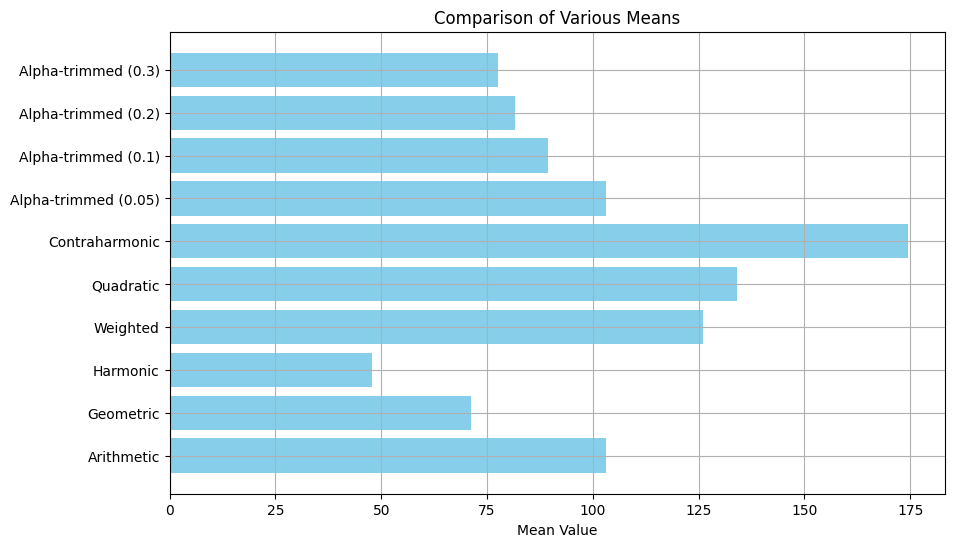

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample data
#data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data = [100, 15, 26, 200, 50, 30, 70, 150, 90, 300]

# Calculate various means
arithmetic_mean = np.mean(data)
geometric_mean = stats.gmean(data)
harmonic_mean = stats.hmean(data)
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weighted_mean = np.average(data, weights=weights)
quadratic_mean = np.sqrt(np.mean(np.square(data)))
contraharmonic_mean = np.sum(np.square(data)) / np.sum(data)

# Alpha-trimmed means
alpha_values = [0.05, 0.1, 0.2, 0.3]
alpha_trimmed_means = [stats.trim_mean(
    data, proportiontocut=alpha) for alpha in alpha_values]

# Plot
means = [arithmetic_mean, geometric_mean, harmonic_mean,
         weighted_mean, quadratic_mean, contraharmonic_mean]
mean_labels = ['Arithmetic', 'Geometric', 'Harmonic',
               'Weighted', 'Quadratic', 'Contraharmonic']

# Extend labels with alpha-trimmed means
for alpha in alpha_values:
    mean_labels.append(f'Alpha-trimmed ({alpha})')

# Extend means list
means.extend(alpha_trimmed_means)

# Plotting the means
plt.figure(figsize=(10, 6))
plt.barh(mean_labels, means, color='skyblue')
plt.xlabel('Mean Value')
plt.title('Comparison of Various Means')
plt.grid(True)

# Show the plot
plt.show()

Each type of mean serves a distinct purpose and is convenient in different scenarios, depending on the nature of the data and the goal of the analysis. Here’s an overview of how I find each of these means to be convenient in various contexts:
1. Arithmetic Mean

    Convenience:
        It’s the most common and intuitive way to calculate an average.
        It works well for data that is symmetrically distributed without significant outliers.
    When to Use:
        When you want a quick, simple measure of central tendency, especially in finance, social sciences, and everyday statistics.
    Limitations:
        Highly sensitive to outliers (extremely large or small values can skew it).
        Not ideal for data with heavy tails or skewed distributions.

2. Geometric Mean

    Convenience:
        It is useful for datasets where values are multiplicative (e.g., growth rates, percentages).
        It smooths out extreme variations and emphasizes relative changes over absolute ones.
    When to Use:
        In finance (e.g., for average investment returns over time).
        For datasets involving ratios, proportions, or datasets with large range differences.
    Limitations:
        Cannot handle datasets containing zero or negative values, as it involves taking roots of products.

3. Harmonic Mean

    Convenience:
        It is effective when averaging rates or ratios, like speeds or efficiencies.
        Works well when small values should have a greater influence on the mean.
    When to Use:
        In situations like averaging rates (e.g., average speed for a round trip, or pricing per unit of product).
    Limitations:
        Like the geometric mean, it’s also sensitive to zero values, which can lead to undefined results.

4. Weighted Mean

    Convenience:
        Allows you to assign more importance to certain data points, which is crucial when not all observations are equally relevant.
    When to Use:
        In calculating GPA (where some courses are weighted more heavily than others).
        In survey analysis where different groups contribute more/less to the overall result.
    Limitations:
        You need to decide the weights, which can sometimes introduce subjectivity or bias.

5. Quadratic Mean (Root Mean Square)

    Convenience:
        Particularly useful in physical applications where magnitudes (such as voltages, forces, or deviations) need to be averaged.
        It places more emphasis on larger values, which is useful in certain scientific and engineering contexts.
    When to Use:
        In physics and engineering, particularly for waveforms or deviations (e.g., RMS voltage in AC circuits).
    Limitations:
        Can overemphasize large values and may not reflect typical values in a skewed dataset.

6. Contraharmonic Mean

    Convenience:
        It’s effective in situations where large values are more important than smaller ones (since it emphasizes the squares of the values).
    When to Use:
        In specific contexts like image processing (for noise filtering).
    Limitations:
        It is very sensitive to extreme values (outliers) and may not be representative of the dataset as a whole.

7. Trimean

    Convenience:
        Combines the median and quartiles, making it less sensitive to outliers than the arithmetic mean, but still offering more insight than just the median.
    When to Use:
        In exploratory data analysis, when you want a robust central tendency measure that balances the influence of the median and extreme values.
    Limitations:
        Not as widely used or as intuitive as the arithmetic mean; may be harder to explain or compute without tools.

8. Winsorized Mean

    Convenience:
        Reduces the effect of extreme outliers by replacing them with the nearest valid values, providing a balance between using all data and avoiding outliers.
    When to Use:
        In datasets where you expect outliers, but still want to keep a somewhat representative average.
        Often used in robust statistics, such as finance, where outliers can distort the arithmetic mean.
    Limitations:
        Requires deciding how much trimming to apply, which can introduce subjectivity.

9. Alpha-Trimmed Mean

    Convenience:
        A more general approach to dealing with outliers, allowing you to specify how much of the data to trim from both ends.
        More flexible than the Winsorized mean, because you can fine-tune how much of the dataset to ignore.
    When to Use:
        In data with a known amount of noise or outliers, or when you don’t want a small number of extreme values to heavily affect the mean.
    Limitations:
        Choosing the appropriate alpha requires judgment, and if improperly tuned, it can lead to the loss of important data or under-representation of the dataset.

Overall Perspectives:

    For general usage: The arithmetic mean is the go-to because of its simplicity, but it is sensitive to outliers.
    For data with significant outliers: The alpha-trimmed mean or Winsorized mean can offer a more robust alternative, especially in finance or social sciences.
    For growth rates or multiplicative processes: The geometric mean is indispensable, especially for datasets involving percentages or ratios.
    For averaging rates or speeds: The harmonic mean is the best choice.
    In scientific and engineering contexts: The quadratic mean (RMS) is often favored for measuring variability or magnitudes.

Each type of mean has a specific role, and the choice depends on the dataset's nature, the distribution of values, and the presence of outliers. It’s essential to choose the appropriate mean based on these factors to get meaningful results.

In [3]:
import pandas as pd

# Create a dictionary with mean names and their corresponding formulas
mean_data = {
    "Mean Type": [
        "Arithmetic Mean",
        "Geometric Mean",
        "Harmonic Mean",
        "Weighted Mean",
        "Quadratic Mean (RMS)",
        "Contraharmonic Mean",
        "Alpha-Trimmed Mean"
    ],
    "Formula": [
        r'$\frac{\sum_{i=1}^{n} x_i}{n}$',
        r'$\left(\prod_{i=1}^{n} x_i\right)^{\frac{1}{n}}$',
        r'$\frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$',
        r'$\frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$',
        r'$\sqrt{\frac{\sum_{i=1}^{n} x_i^2}{n}}$',
        r'$\frac{\sum_{i=1}^{n} x_i^2}{\sum_{i=1}^{n} x_i}$',
        r'$\frac{\sum_{i=k+1}^{n-k} x_i}{n - 2k}$'
    ]
}

# Convert the dictionary into a DataFrame
mean_df = pd.DataFrame(mean_data)

# Display the DataFrame in a Jupyter notebook or Python console
mean_df




,Mean Type,Formula
0,Arithmetic Mean,$\frac{\sum_{i=1}^{n} x_i}{n}$
1,Geometric Mean,$\left(\prod_{i=1}^{n} x_i\right)^{\frac{1}{n}}$
2,Harmonic Mean,$\frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$
3,Weighted Mean,$\frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} ...
4,Quadratic Mean (RMS),$\sqrt{\frac{\sum_{i=1}^{n} x_i^2}{n}}$
5,Contraharmonic Mean,$\frac{\sum_{i=1}^{n} x_i^2}{\sum_{i=1}^{n} x_i}$
6,Alpha-Trimmed Mean,$\frac{\sum_{i=k+1}^{n-k} x_i}{n - 2k}$


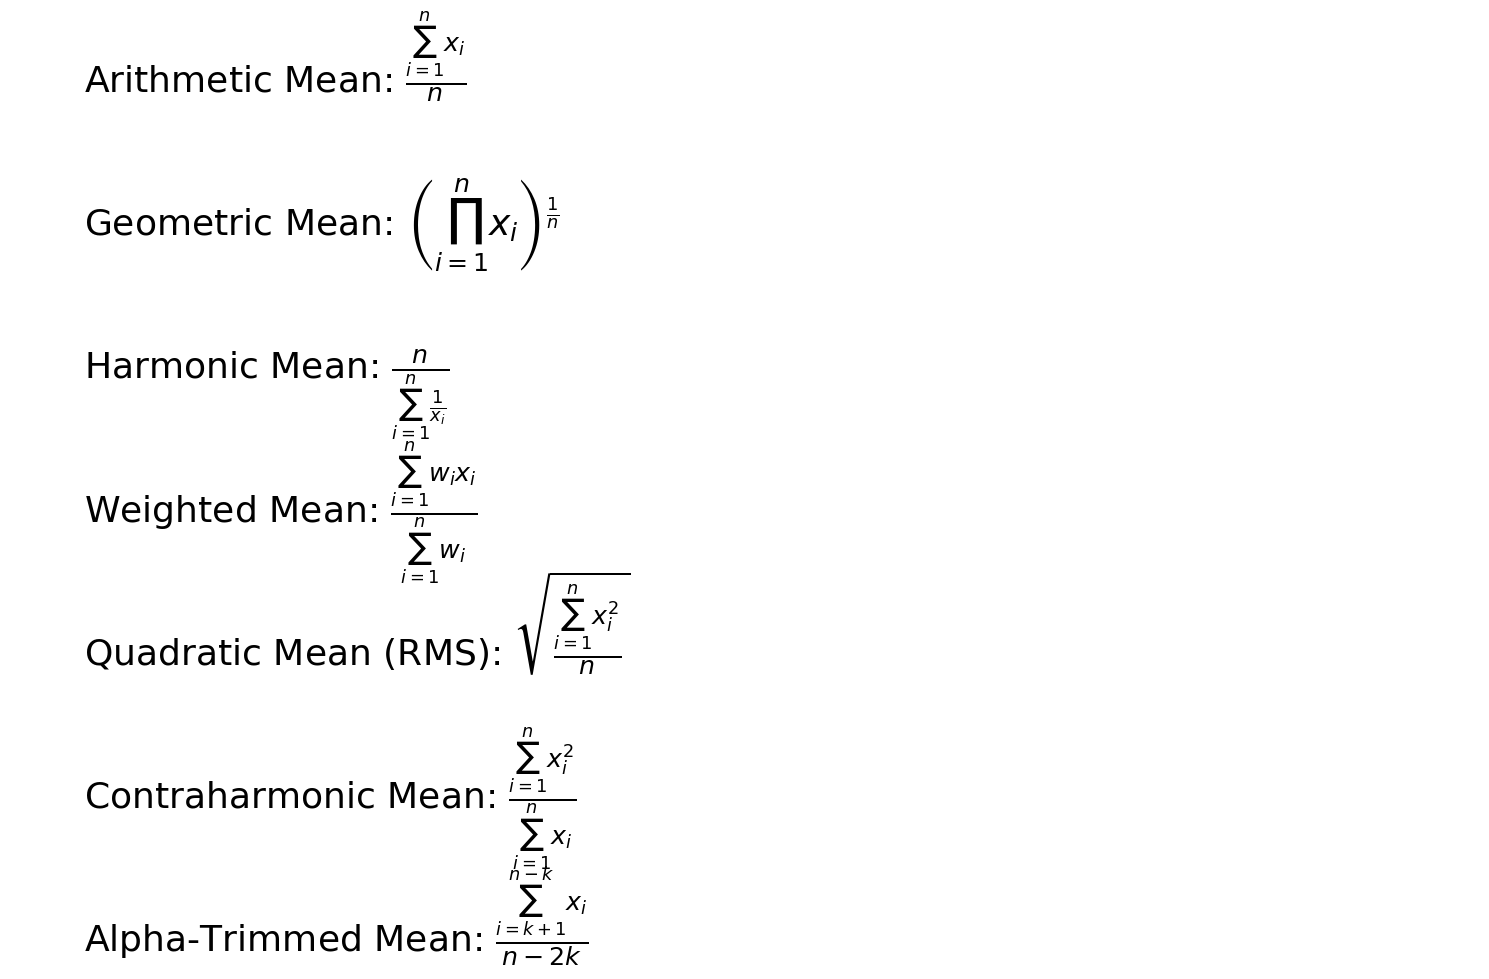

In [21]:
import matplotlib.pyplot as plt

# Re-define the text containing the formulas for each mean
mean_formulas = [
    r'Arithmetic Mean: $\frac{\sum_{i=1}^{n} x_i}{n}$',
    r'Geometric Mean: $\left(\prod_{i=1}^{n} x_i\right)^{\frac{1}{n}}$',
    r'Harmonic Mean: $\frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$',
    r'Weighted Mean: $\frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$',
    r'Quadratic Mean (RMS): $\sqrt{\frac{\sum_{i=1}^{n} x_i^2}{n}}$',
    r'Contraharmonic Mean: $\frac{\sum_{i=1}^{n} x_i^2}{\sum_{i=1}^{n} x_i}$',
    r'Alpha-Trimmed Mean: $\frac{\sum_{i=k+1}^{n-k} x_i}{n - 2k}$'
]

# Adjust the spacing between the formulas to avoid overlapping
plt.figure(figsize=(15, 10))

# Loop through the formulas and plot them with increased spacing
for i, formula in enumerate(mean_formulas):
    # Increased vertical spacing
    plt.text(0.05, 1.0 - i * 0.2, formula, fontsize=26)

plt.axis('off')  # Turn off the axis
#plt.title('Formulas for Different Types of Means', fontsize=14)
plt.tight_layout()
plt.show()

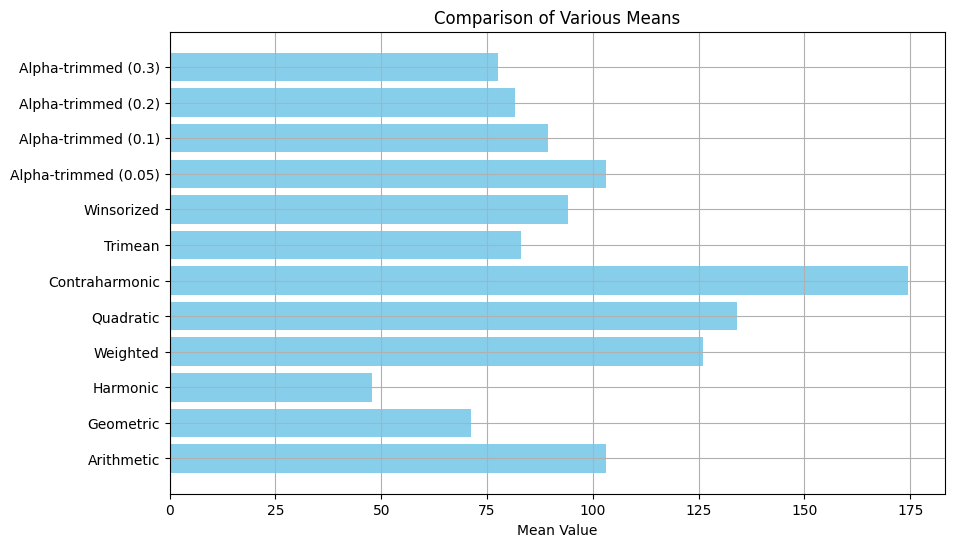

In [23]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample data
data = [100, 15, 26, 200, 50, 30, 70, 150, 90, 300]

# Convert data to NumPy array
data_array = np.array(data)

# Calculate various means
arithmetic_mean = np.mean(data_array)
geometric_mean = stats.gmean(data_array)
harmonic_mean = stats.hmean(data_array)
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weighted_mean = np.average(data_array, weights=weights)
quadratic_mean = np.sqrt(np.mean(np.square(data_array)))
contraharmonic_mean = np.sum(np.square(data_array)) / np.sum(data_array)

# Alpha-trimmed means
alpha_values = [0.05, 0.1, 0.2, 0.3]
alpha_trimmed_means = [stats.trim_mean(
    data_array, proportiontocut=alpha) for alpha in alpha_values]

# Calculate Trimean
q1 = np.percentile(data_array, 25)
median = np.median(data_array)
q3 = np.percentile(data_array, 75)
trimean = (q1 + 2 * median + q3) / 4

# Calculate Winsorized Mean (cutting 10% from both ends)
winsorized_data = stats.mstats.winsorize(data_array, limits=[0.1, 0.1])
winsorized_mean = np.mean(winsorized_data)

# Extend means list with Trimean and Winsorized Mean
means = [arithmetic_mean, geometric_mean, harmonic_mean,
         weighted_mean, quadratic_mean, contraharmonic_mean]
mean_labels = ['Arithmetic', 'Geometric', 'Harmonic',
               'Weighted', 'Quadratic', 'Contraharmonic']

# Add Trimean and Winsorized Mean
means.append(trimean)
mean_labels.append('Trimean')

means.append(winsorized_mean)
mean_labels.append('Winsorized')

# Extend labels with alpha-trimmed means
for alpha in alpha_values:
    mean_labels.append(f'Alpha-trimmed ({alpha})')

# Extend means list with alpha-trimmed means
means.extend(alpha_trimmed_means)

# Plotting the means
plt.figure(figsize=(10, 6))
plt.barh(mean_labels, means, color='skyblue')
plt.xlabel('Mean Value')
plt.title('Comparison of Various Means')
plt.grid(True)

# Show the plot
plt.show()

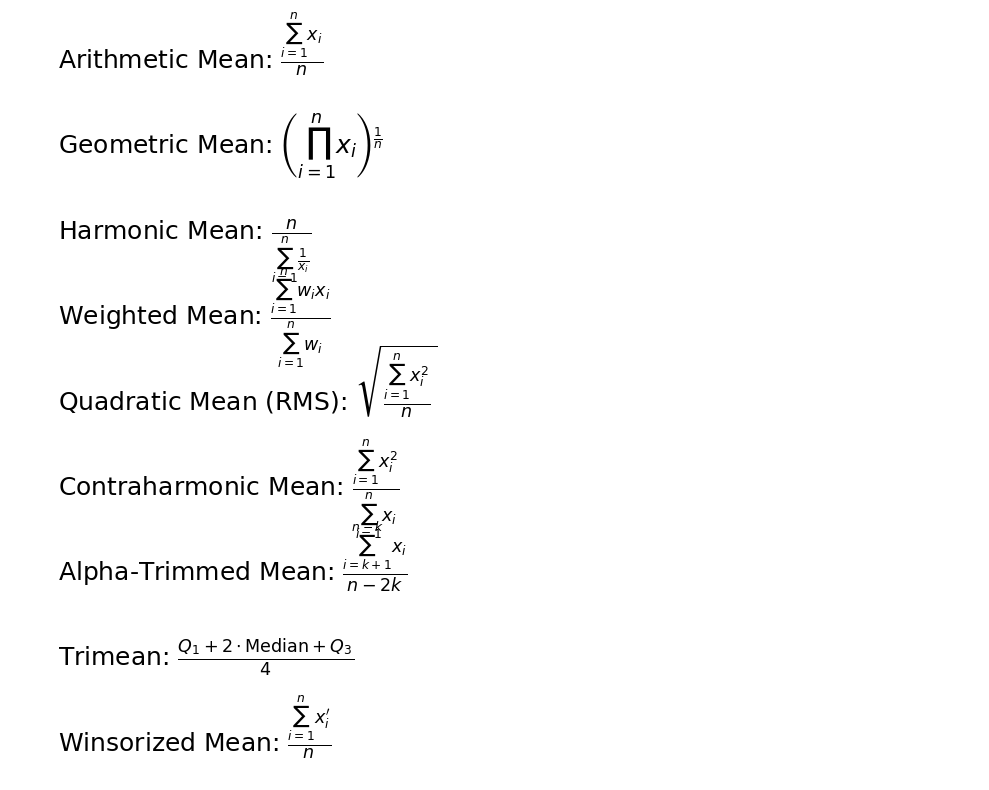

In [10]:
import matplotlib.pyplot as plt

# Re-define the text containing the formulas for each mean
mean_formulas = [
    r'Arithmetic Mean: $\frac{\sum_{i=1}^{n} x_i}{n}$',
    r'Geometric Mean: $\left(\prod_{i=1}^{n} x_i\right)^{\frac{1}{n}}$',
    r'Harmonic Mean: $\frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}}$',
    r'Weighted Mean: $\frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$',
    r'Quadratic Mean (RMS): $\sqrt{\frac{\sum_{i=1}^{n} x_i^2}{n}}$',
    r'Contraharmonic Mean: $\frac{\sum_{i=1}^{n} x_i^2}{\sum_{i=1}^{n} x_i}$',
    r'Alpha-Trimmed Mean: $\frac{\sum_{i=k+1}^{n-k} x_i}{n - 2k}$',
    r'Trimean: $\frac{Q_1 + 2 \cdot \text{Median} + Q_3}{4}$',
    r'Winsorized Mean: $\frac{\sum_{i=1}^{n} x_i^{\prime}}{n}$'
]

# Adjust the spacing between the formulas to avoid overlapping
plt.figure(figsize=(10, 8))  # Increase figure size for better spacing

# Loop through the formulas and plot them with increased spacing
for i, formula in enumerate(mean_formulas):
    # Increased vertical spacing (adjusting the 'y' position)
    # Increase fontsize to 18
    plt.text(0.05, 1.0 - i * 0.12, formula, fontsize=18)

plt.axis('off')  # Turn off the axis
plt.tight_layout()
plt.show()

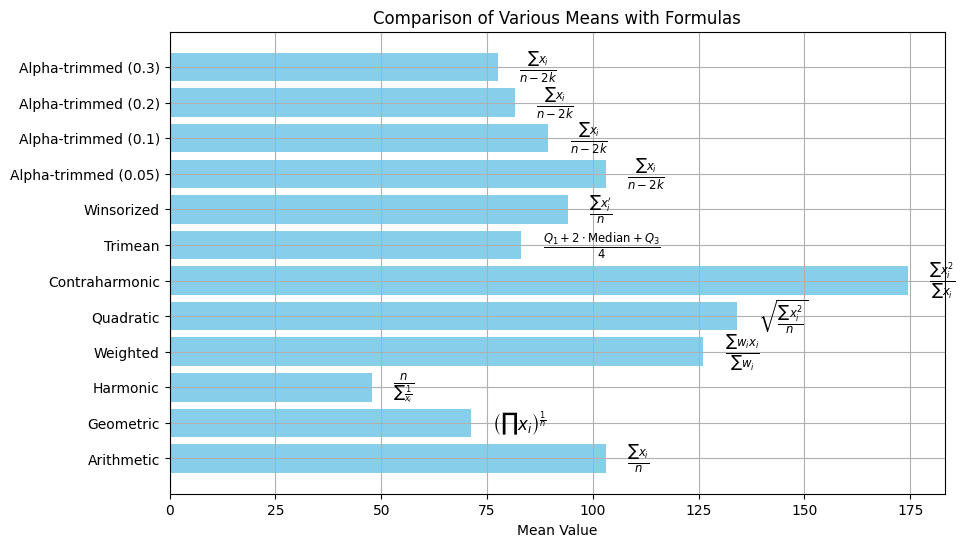

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample data
data = [100, 15, 26, 200, 50, 30, 70, 150, 90, 300]

# Convert data to NumPy array
data_array = np.array(data)

# Calculate various means
arithmetic_mean = np.mean(data_array)
geometric_mean = stats.gmean(data_array)
harmonic_mean = stats.hmean(data_array)
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weighted_mean = np.average(data_array, weights=weights)
quadratic_mean = np.sqrt(np.mean(np.square(data_array)))
contraharmonic_mean = np.sum(np.square(data_array)) / np.sum(data_array)

# Alpha-trimmed means
alpha_values = [0.05, 0.1, 0.2, 0.3]
alpha_trimmed_means = [stats.trim_mean(
    data_array, proportiontocut=alpha) for alpha in alpha_values]

# Calculate Trimean
q1 = np.percentile(data_array, 25)
median = np.median(data_array)
q3 = np.percentile(data_array, 75)
trimean = (q1 + 2 * median + q3) / 4

# Calculate Winsorized Mean (cutting 10% from both ends)
winsorized_data = stats.mstats.winsorize(data_array, limits=[0.1, 0.1])
winsorized_mean = np.mean(winsorized_data)

# Extend means list with Trimean and Winsorized Mean
means = [arithmetic_mean, geometric_mean, harmonic_mean,
         weighted_mean, quadratic_mean, contraharmonic_mean]
mean_labels = ['Arithmetic', 'Geometric', 'Harmonic',
               'Weighted', 'Quadratic', 'Contraharmonic']

# Add Trimean and Winsorized Mean
means.append(trimean)
mean_labels.append('Trimean')

means.append(winsorized_mean)
mean_labels.append('Winsorized')

# Extend labels with alpha-trimmed means
for alpha in alpha_values:
    mean_labels.append(f'Alpha-trimmed ({alpha})')

# Extend means list with alpha-trimmed means
means.extend(alpha_trimmed_means)

# Define formulas corresponding to each mean
mean_formulas = [
    r'$\frac{\sum x_i}{n}$',  # Arithmetic Mean
    r'$\left(\prod x_i\right)^{\frac{1}{n}}$',  # Geometric Mean
    r'$\frac{n}{\sum \frac{1}{x_i}}$',  # Harmonic Mean
    r'$\frac{\sum w_i x_i}{\sum w_i}$',  # Weighted Mean
    r'$\sqrt{\frac{\sum x_i^2}{n}}$',  # Quadratic Mean
    r'$\frac{\sum x_i^2}{\sum x_i}$',  # Contraharmonic Mean
    r'$\frac{Q_1 + 2 \cdot \text{Median} + Q_3}{4}$',  # Trimean
    r'$\frac{\sum x_i^{\prime}}{n}$'  # Winsorized Mean
] + [r'$\frac{\sum x_i}{n - 2k}$'] * len(alpha_trimmed_means)  # Alpha-Trimmed Mean formula

# Plotting the means with formulas at the end
plt.figure(figsize=(10, 6))
bars = plt.barh(mean_labels, means, color='skyblue')

# Add the formulas to the end of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, mean_formulas[i],
             va='center', fontsize=12, color='black')

plt.xlabel('Mean Value')
plt.title('Comparison of Various Means with Formulas')
plt.grid(True)

# Show the plot
plt.show()